**Question 2.** This question uses the Airbnb data to practice making visualizations

1. Load the ./data/airbnb_hw.csv data with Pandas. You should have cleaned the Price variable in question 2, and you'll need it later for this question.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

airbnb = pd.read_csv('airbnb_hw.csv')


In [ ]:
#Clean
price = airbnb['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce')
airbnb['Price'] = price
del price

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [ ]:

print("Dimensions of the data:", airbnb.shape)
print("Variables included:", airbnb.columns)


Dimensions of the data: (30478, 13)
Variables included: Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


The dimensions of the data are 30478 by 13. There are 30,478 observations and the variables included are: Host Id, Host Since, Name, Neighborhood, Property Type, Review Score, Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, and Review Scores Rating


In [ ]:
print(airbnb.head())

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews  Price  Review Scores 

3. Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [ ]:
room_property = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
print(room_property)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

The patterns that I see are that aparments are most commonly rented. Also bigger places are more commonly rented by rooms than the entire home . Private rooms are more common for renting in houses, bed & breakfasts, dorms, houses, and others.

4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

Text(0, 0.5, 'Frequency')

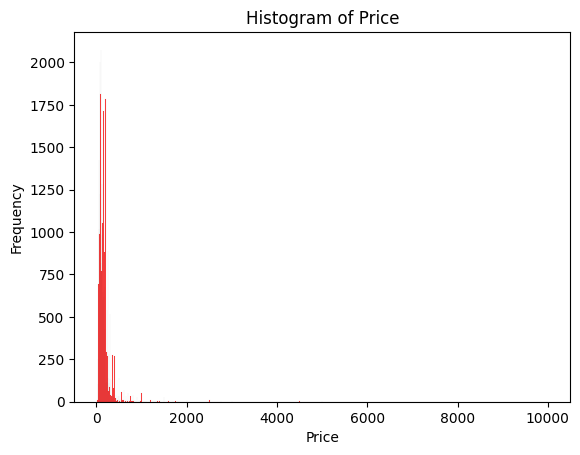

In [ ]:
#Histogram
sns.histplot(data=airbnb,x='Price', color='red')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Density')

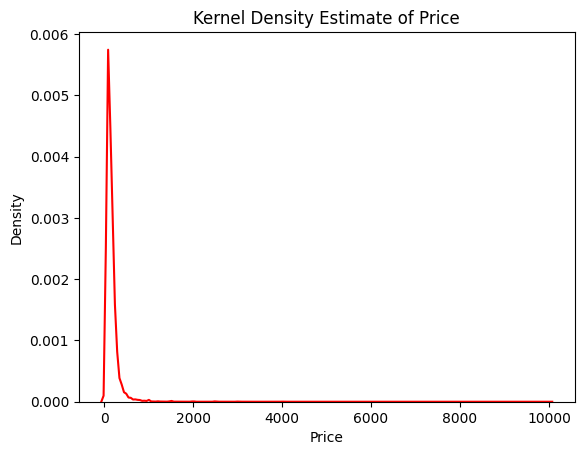

In [ ]:
#Kernel Plot
sns.kdeplot(data=airbnb, x='Price', color='red')
plt.title('Kernel Density Estimate of Price')
plt.xlabel('Price')
plt.ylabel('Density')

Text(0.5, 1.0, 'Boxplot of Price')

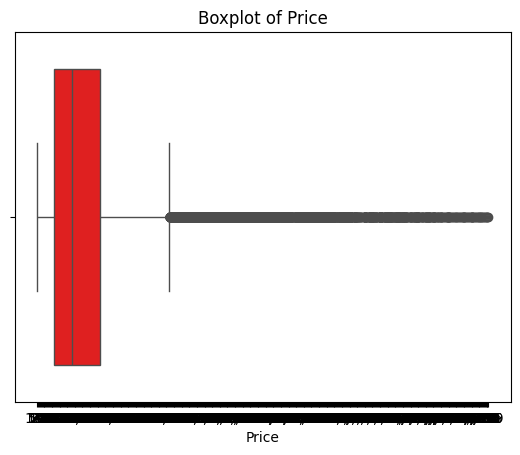

In [ ]:
# Box Plot
sns.boxplot(data=airbnb, x = 'Price', color='red')
plt.title('Boxplot of Price')

In [ ]:
airbnb['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

The data does look like it may be badly scaled and there are also many outliers. the standard deviation is a very high number which is not a good thing.

In [ ]:
#Changing Price into Price_log
airbnb['price_log'] = np.log(airbnb['Price'])


Text(0, 0.5, 'Frequency')

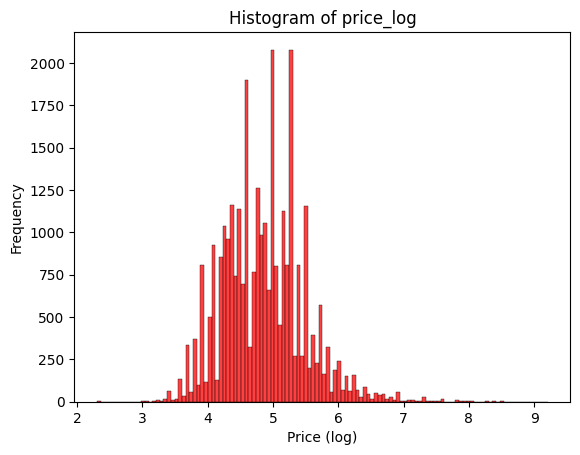

In [ ]:
#Histogram of Price (log)
sns.histplot(airbnb['price_log'], color='red')
plt.title('Histogram of price_log')
plt.xlabel('Price (log)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

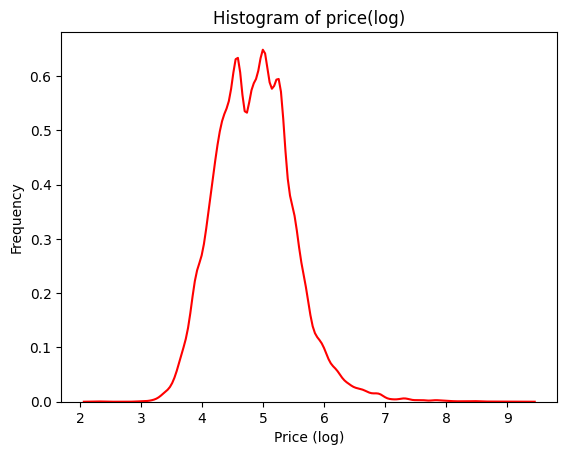

In [ ]:
#Kernel Plot
sns.kdeplot(airbnb['price_log'], color='red')
plt.title('Histogram of price(log)')
plt.xlabel('Price (log)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Boxplot of price (log)')

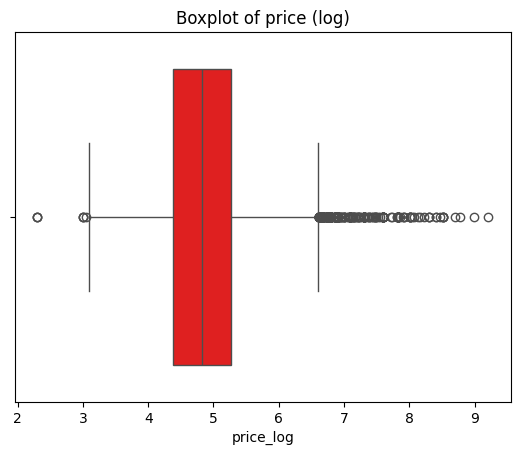

In [ ]:
#Boxplot
sns.boxplot(data = airbnb, x="price_log",color='red')
plt.title('Boxplot of price (log)')

In [ ]:
#Statistical Description
airbnb['price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64

Now with the log price the data is scaled much better and the standard deviation is at a good place.

5. Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='Beds', ylabel='price_log'>

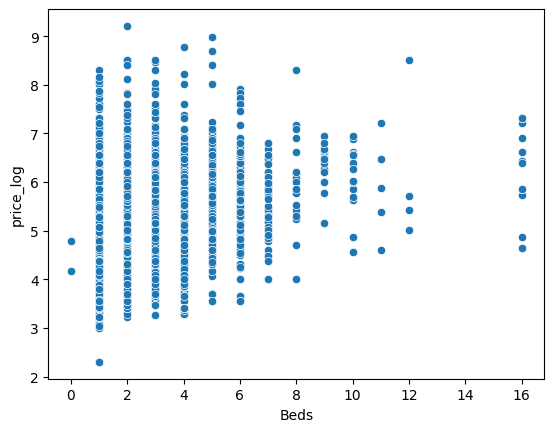

In [ ]:
sns.scatterplot(x='Beds', y='price_log', data=airbnb)

There is a lot more variation in price(log) with the less amount of beds there are. The price also increases as the amount of beds increases.

```
# This is formatted as code
```



In [ ]:
airbnb.loc[:,['Beds', 'Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

6. Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

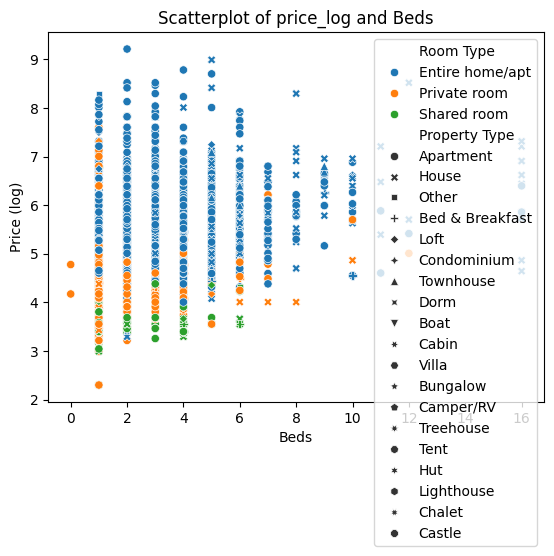

In [ ]:
# Scatterplot
sns.scatterplot(x = 'Beds', y = 'price_log', hue='Room Type', style = 'Property Type', data =airbnb)
plt.title('Scatterplot of price_log and Beds')
plt.xlabel('Beds')
plt.ylabel('Price (log)')
plt.show()

In [ ]:
variable = 'Price'
group = 'Room Type'
airbnb.loc[:,[group,variable]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

Based on the plot, entire homes/appt tend to be higher on the price(log) scale. Shared rooms and private rooms are lowest on this scale, indicating tat they are usually cheaper on average



7. We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

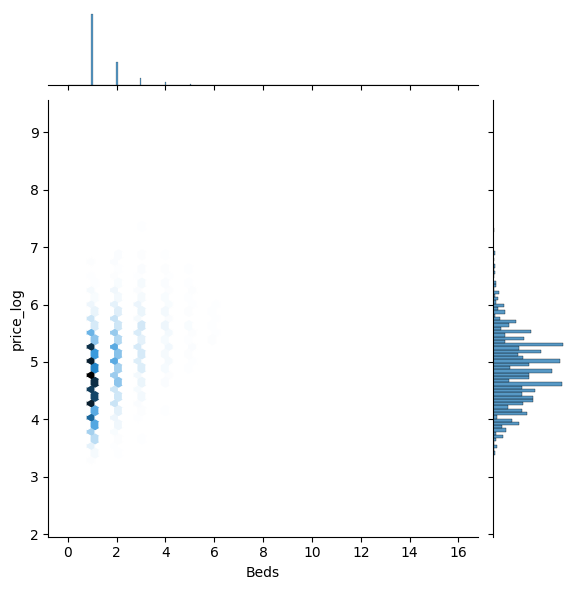

In [ ]:
sns.jointplot(x='Beds', y='price_log', data=airbnb, kind = 'hex')
plt.show()

The majority of data is distributed between 1 and 2 bedrooms with a vast majority at 1 bedroom. Plots 5 and 6 make it seem like there was a lot of data for all the other amounts of beds as well. It can allow us to misinterpret our results because of all the outliers shown.